# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1 Is the heart rate data normally distributed?
>Yes, it looks to be roughly normally distributed.

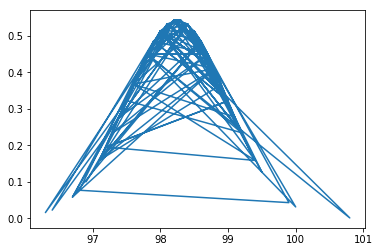

In [3]:
plt.plot(df.temperature,mlab.normpdf(df.temperature, df.temperature.mean(), df.temperature.std()))
plt.show()

# 2 Are the observations independent? Do we have a large enough sample?

>With 130 samples, we have a sifficiently large sample to choose from.
Also, given we are dealing with a sample of 130 different, presumably unrelated people, we can conclude that the samples are also independent.

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# 3 Is the true population mean really 98.6?
## z or t statistic? one or two tailed test?

>Our null: 98.6 is the population mean temperature.
Z-stat because n > 30
two tailed

In [5]:
sam_mean = df.temperature.mean()
sam_std = df.temperature.std()

#assume std of population  = 40 from sample
#use that to compute std of sampling dist

std_samp_dist = sam_std/np.sqrt(100)
print(std_samp_dist)

0.0733183158039


In [6]:
z_score = (sam_mean - 98.6)/std_samp_dist
#We know from our table that the 95% confidence interval for 
#a two tailed test is [-1.96,1.96], so we compare  to that

print(z_score)

-4.78419651247


Given our z-statistic, we would reject the null. It looks like 98.6 likely isn't the population's mean temperature.

## At what temperature should we consider someone's temperature to be "abnormal"?
> less than 97.96 and greater than 98.54

In [11]:
#Given what we know, we use std and z-score of 1.96 to construct the interval
CI = np.percentile(df.temperature,[2.5,97.5])
print(CI)
#I think this tells us the pecentiles for only our sample's distribution, so I'll do it as described in lessons

[ 96.7225  99.4775]


In [14]:
#get sample stats
sam_std = df.temperature.std()
sam_mean = df.temperature.mean()
#find approacimate samp_dist std using sample standard dev and sqrt of sample size
approx_std_of_samp_dist = sam_std/np.sqrt(100)

In [28]:
#find margin of error at 95% ~2*std of sampling dist std
mar_of_err = 2*approx_std_of_samp_dist

#make 95% z-score CI
con_in = np.array([-1.96,1.96])
healthy_hr_dev = con_in*mar_of_err
#show our range of deviation in hr
print(healthy_hr)
#Healthy Heart Rates given our sample mean and the deviation allowed
healthy_dr = healthy_hr_dev + sam_mean
print(healthy_dr)

[-0.2874078  0.2874078]
[ 97.96182297  98.53663857]


## Is there a significant difference between males and females in normal temperature?
## What test did you use and why?
>Two tailed difference of means test

### Write a story with your conclusion in the context of the original problem.

>A long time ago Carl Wunderlich implanted the number 98.6 into our minds when discussing body temperature. While this is close to the correct number, he was a little hot in his estimate. Given modern statistical techniques, the actual population's mean temperature, is likely between 97.96 and 98.53 degrees. So while Carl was not far off, the power of statistics shows us that he is, in fact, insignificant, at least statistically.

>Moving on from this, it actually does seem that men and women have a statistically different mean temperature. I don't have a degree in biology, but I'd venture to ssay that women typically have more bodyfat, so they can run at a colder temperture than men and still maintain their needed internal temperature.

In [29]:
male = df[df['gender']=='M']
female = df[df['gender']=='F']

In [30]:
male_mean = male.temperature.mean()
male_std = male.temperature.std()

female_mean = female.temperature.mean()
female_std = female.temperature.std()

### Null: no difference
### Alt: difference

In [32]:
#find std of difference
std_diff = np.sqrt((male_std**2)/len(male) + (female_std**2)/len(female))

In [33]:
#find diff of means
diff_of_means = male_mean - female_mean

In [37]:
z_score = (diff_of_means - 0)/std_diff

print(z_score)

-2.28543453817
